### This example shows how to use our modules to get the geometrical information from AFM images of CNFs.

In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import pprint
import numpy as np
import pickle

from original_modules import imptools
from original_modules.Image_class import ProcessedImage
from original_modules.BG_Calibrater import BG_Calibrater
from original_modules.Segmentater import Segmentater
from original_modules.Skeltonizer import Skeltonizer
from original_modules.KinkDetector import KinkDetector
from original_modules.DentAnalyzer import DentAnalyzer

In [16]:
# select the data
f = Path('./data_example/HP50_000.txt')

# As our original data is 1D text data of the height, we run the following process to convert to 2D numpy array
AFM_data = np.loadtxt(f, skiprows=1)
image_size = int(np.sqrt(len(AFM_data)))
height_data = AFM_data.reshape((image_size, image_size)) # 2D numpy array
# All of our AFM data is square. We did not check whether our modules work for rectanle images.

calibrater = BG_Calibrater()
segmentater = Segmentater()
skeltonizer = Skeltonizer()
kinkdetector = KinkDetector()
dentanalyzer = DentAnalyzer()

# The modules should be executed in the following order.
image = ProcessedImage(height_data, name=f.stem)
calibrater(image)
segmentater(image)
skeltonizer(image)
kinkdetector(image)
dentanalyzer(image)

# The results have been saved as the attributes of 'image'

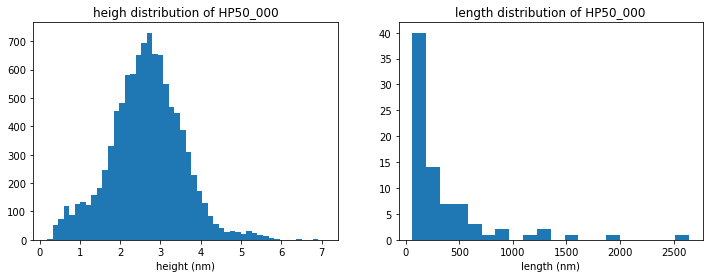

In [64]:
# Some examples to show the results are as follows.


# The height and length distribution
height = image.calibrated_image[np.where(image.skeleton_image)]
length = list()
for i in range(1, image.nLabels):
    y, x, h, w, area = image.data[i]
    l = imptools.get_length(image.skeleton_image[x: x + w, y: y + h])
    length.append(l)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = axes.ravel()
ax[0].hist(height, bins=50)
ax[0].set_xlabel('height (nm)')
ax[0].set_title('heigh distribution of ' + image.name)
ax[1].hist(length, bins=20)
ax[1].set_xlabel('length (nm)')
ax[1].set_title('length distribution of ' + image.name)
plt.show()

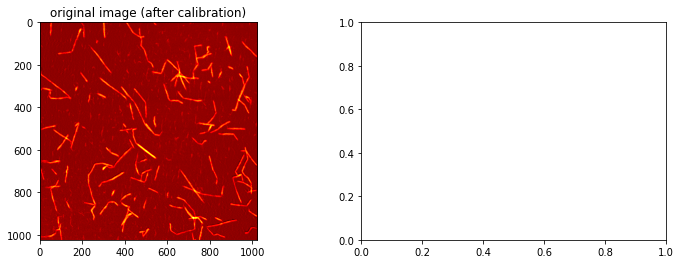

In [63]:
# The original image and mapping image
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = axes.ravel()
ax[0].imshow(image.calibrated_image, cmap='hot')
ax[0].set_title('original image (after calibration)')
plt.show()